## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
# load the data set ans show the first five transaction
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv"
df = pd.read_csv(url)
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
#3 check missing values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a 

**DataFrame Structure**:  
   - The dataset contains **20,507 rows** and **5 columns**.  
   - Column data types include:  
     - **int64**: 1 column (Transaction).  
     - **object**: 4 columns (Item, date_time, period_day, weekday_weekend).  
   - The dataset consumes **801.2 KB** of memory.  

**Missing Values**:  
   - There are **no missing values** in any of the columns. Each column has 20,507 non-null entries, matching the total row count.  

**Overall Conclusion**:  
   - The dataset is clean with respect to missing values and ready for further analysis. No imputation or data removal is necessary in this regard.  

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

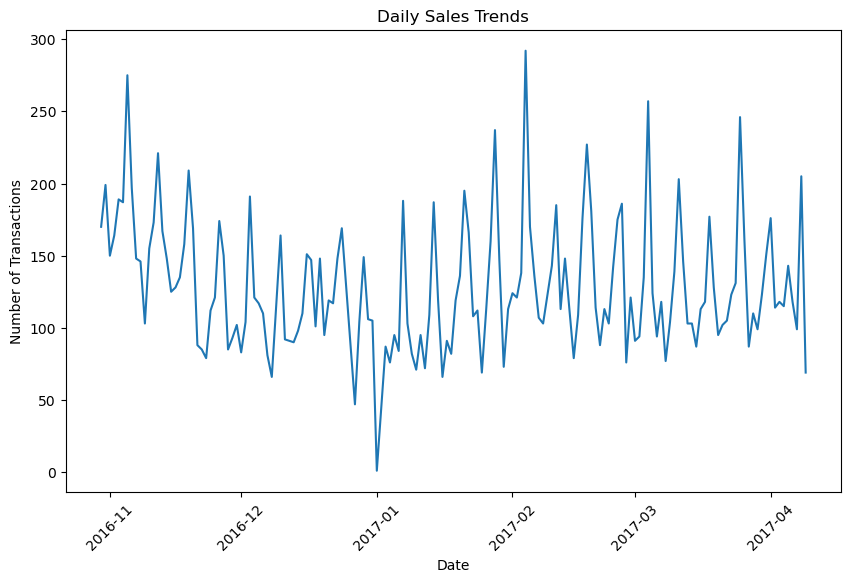

In [21]:
#5
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

# Extract Date, Hour, and Day of the Week
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek

daily_transactions = df.groupby('date').size()

# Plot the daily transaction trend
plt.figure(figsize=(10,6))
daily_transactions.plot(kind='line', title='Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [6]:
# 6
df['date_time'] = pd.to_datetime(df['date_time'])
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

# Display the DataFrame
df[['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend', 'day', 'month', 'year', 'time', 'hour', 'day_name']].sample(5)


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
8934,4500,Muffin,2017-01-11 08:19:00,morning,weekday,11,1,2017,08:19:00,8,Wednesday
5075,2527,Tea,2016-12-03 12:34:00,afternoon,weekend,3,12,2016,12:34:00,12,Saturday
1542,744,Pastry,2016-11-07 09:31:00,morning,weekday,7,11,2016,09:31:00,9,Monday
2209,1078,Scandinavian,2016-11-11 14:15:00,afternoon,weekday,11,11,2016,14:15:00,14,Friday
19843,9382,Coffee,2017-04-04 14:52:00,afternoon,weekday,4,4,2017,14:52:00,14,Tuesday



Alright, now I can easily create a visualization of monthly sales.

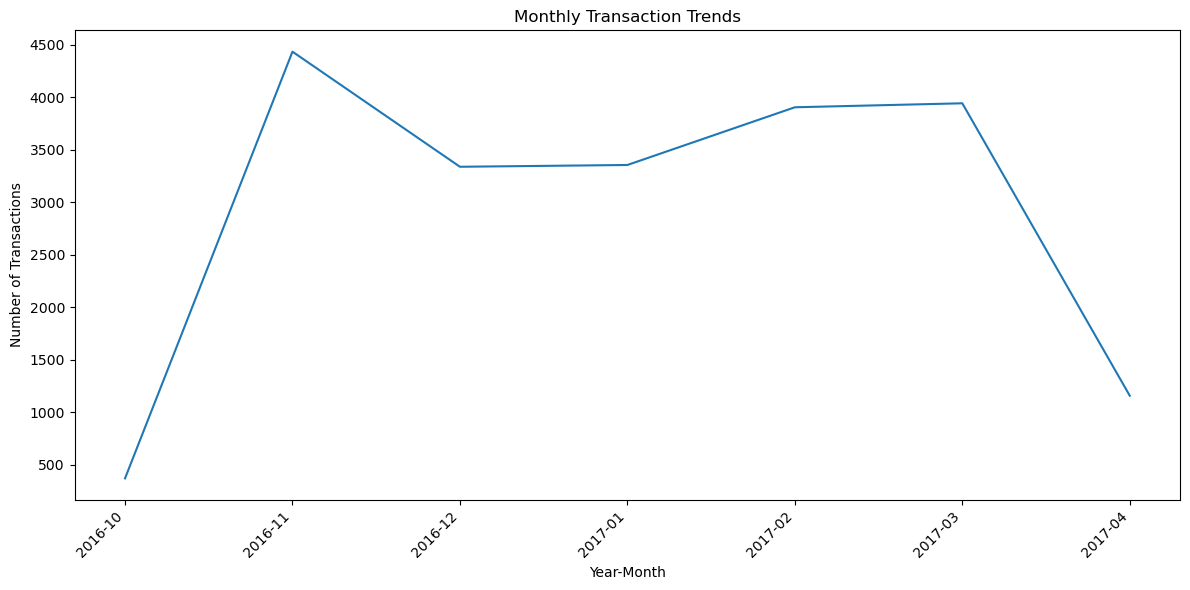

In [7]:
# 7
# Create a 'Year-Month' column
df['Year_Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# Group by 'Year-Month' and count transactions
monthly_transactions = df.groupby('Year_Month')['Transaction'].count().reset_index()

# Plotting the monthly transaction trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['Year_Month'], monthly_transactions['Transaction'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

8. Now, the visualization above provides better insights: The visualization highlights monthly transaction trends, showing a sharp rise in November 2016, possibly driven by promotions or seasonal shopping. Transactions decreased in December but remained steady from January to March 2017. A notable decline occurred in April 2017, likely due to seasonality or reduced demand, reflecting the influence of seasonal patterns and promotional activities on customer behavior.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [42]:
#9
df['day_name'] = df['date_time'].dt.day_name()

# Add 'weekday_weekend' column
df['weekday_weekend'] = df['day_name'].apply(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

# Get unique weekday names
weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
print("Unique weekday names:", weekday_names)

# Get unique weekend names
weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [57]:
#10
transaction = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction = transaction.pivot(index='month', columns='day_name', values='Transaction').fillna(0)

# Mengatur urutan hari
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction = transaction[days_order]

# Mengonversi hasil menjadi integer
transaction = transaction.astype(int)

display(transaction)

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is: Weekends, especially Saturdays, show consistently higher activity, indicating they are the peak days, with Sundays also performing well in some months. Weekday activity varies, with higher values on Tuesdays and Fridays in months like January and November. There is noticeable seasonality, with March and November having higher activity, while April shows a significant drop. October has mostly missing data except for Sundays, suggesting potential data issues. Overall, the trends highlight a weekend spike, useful for optimizing scheduling and resource allocation during peak times.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

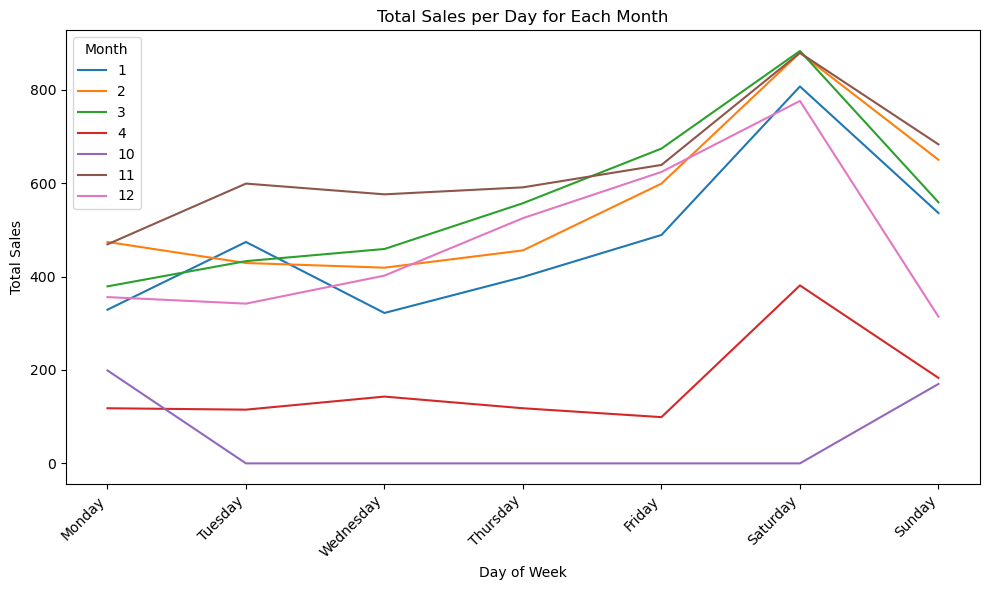

In [44]:
# 12
# Create the transaction table 
transaction_table = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]
transaction_table = transaction_table.astype(int)

# Transpose the table for the desired plot
transaction_table = transaction_table.T  
# Create the line chart
transaction_table.plot(kind='line', figsize=(10, 6)) 
plt.title('Total Sales per Day for Each Month')
plt.xlabel('Day of Week')  # Changed x-axis label
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Month')  # Changed legend title
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that The visual shows sales patterns by day of the week for each month, revealing that Saturdays are typically the busiest day, with Sundays also seeing high sales in some months. Weekday sales fluctuate, with some months (like November) showing steady trends, while others (like April) remain low, indicating reduced activity or other factors. October data shows low or no weekday activity, with a Sunday spike, possibly due to data gaps or unique trends. Overall, the weekend, especially Saturdays, plays a key role in sales, informing strategies for resource allocation, marketing, and promotions.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [46]:
# 14
days_name = df['period_day'].unique()
print(days_name)

['morning' 'afternoon' 'evening' 'night']


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [48]:
# 15
hour_ranges = df.groupby('period_day')['hour'].unique()
print(hour_ranges)

period_day
afternoon    [12, 13, 14, 15, 16]
evening          [17, 18, 19, 20]
morning      [9, 10, 11, 8, 7, 1]
night                [21, 23, 22]
Name: hour, dtype: object


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

The odd things lies in how the hours are grouped into periods of the day:

Morning hours: Include 1 in "morning" is unusual since it is typically considered part of night time.

Order of hours: The hours are not listed in chronological order, which can leads to confusion in terms groupings .

Inconsistent groupings: Some hours are assigned to periods that don't align with standard definitions, like 1 being in "morning" instead of "night."

This suggests a need to reorganize the periods to follow common conventions, such as defining "morning" as [5, 6, 7, 8, 9, 10, 11] and "night" to include early hours like 1.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

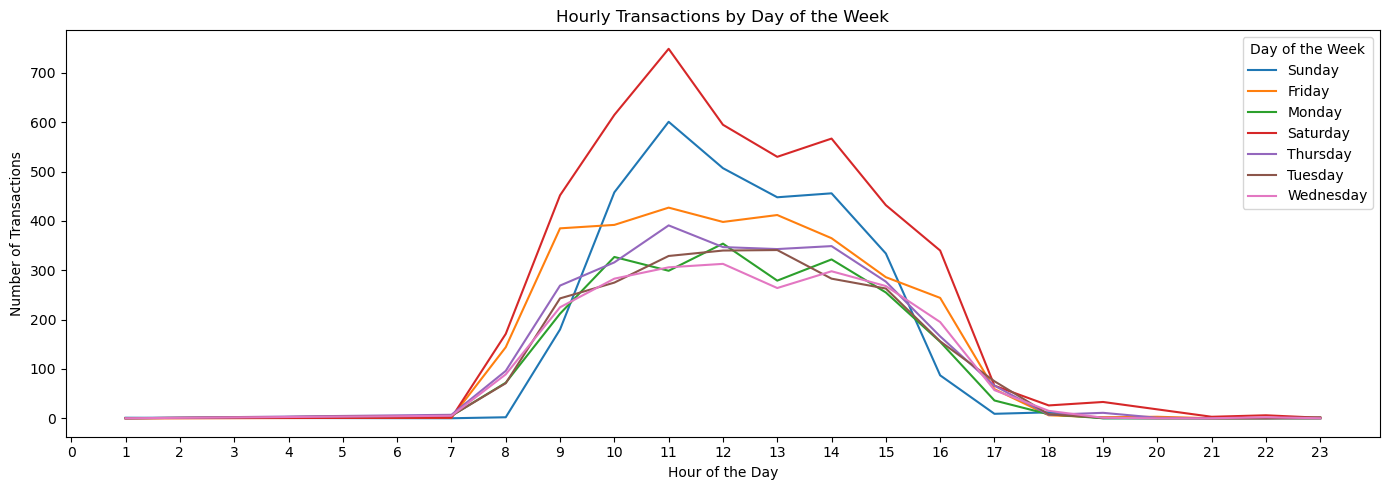

In [52]:
# 17
# Group by 'day_name' and 'hour' to get the number of transactions
hourly_transactions = df.groupby(['day_name', 'hour']).size().unstack(fill_value=0)

# Sort days of the week for proper ordering
ordered_days = ['Sunday','Friday','Monday',  'Saturday', 'Thursday', 'Tuesday', 'Wednesday', ]
hourly_transactions = hourly_transactions.reindex(ordered_days)

# Plotting the hourly transactions for each day of the week
plt.figure(figsize=(14, 5))

for day in ordered_days:
    plt.plot(hourly_transactions.columns, hourly_transactions.loc[day], label=day)

# Adding titles and labels
plt.title('Hourly Transactions by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.legend(title='Day of the Week')
# plt.grid(True)
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that the daily sales trend shows a consistent pattern, with transactions rising in the early morning (around 8 AM), peaking between 10 AM and 2 PM, and gradually declining after 4 PM. Saturdays have the highest peak, making it the busiest day, followed by Sundays and Fridays. Midweek days like Tuesday and Wednesday have more moderate sales. This trend emphasizes the need to allocate resources effectively, especially during peak hours and weekends.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

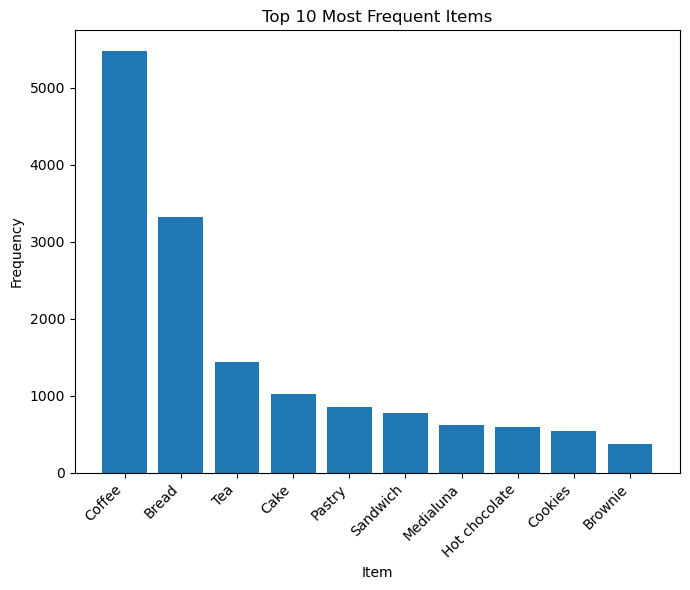

In [56]:
# 19
# Group by item and count occurrences
item_frequency = df.groupby('Item')['Transaction'].count().reset_index()

# Rename the 'Transaction' column to 'Frequency'
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})

# Sort by frequency in descending order
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 items
plt.figure(figsize=(7, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

C:\Users\Michelle\AppData\Local\Temp\ipykernel_2552\4245627155.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap


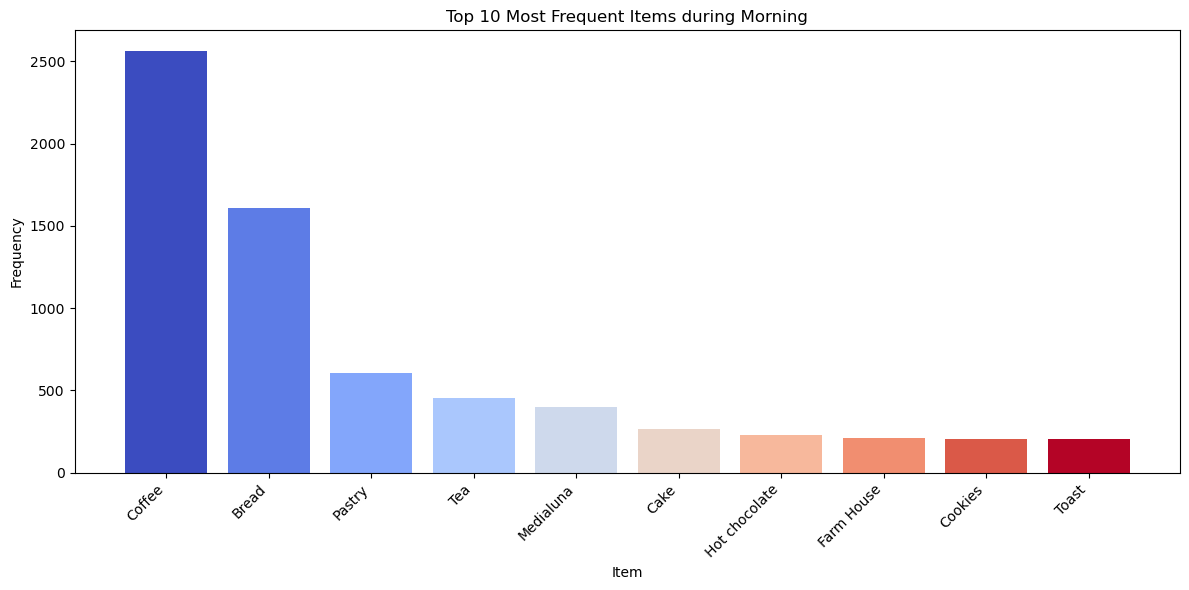

C:\Users\Michelle\AppData\Local\Temp\ipykernel_2552\4245627155.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap


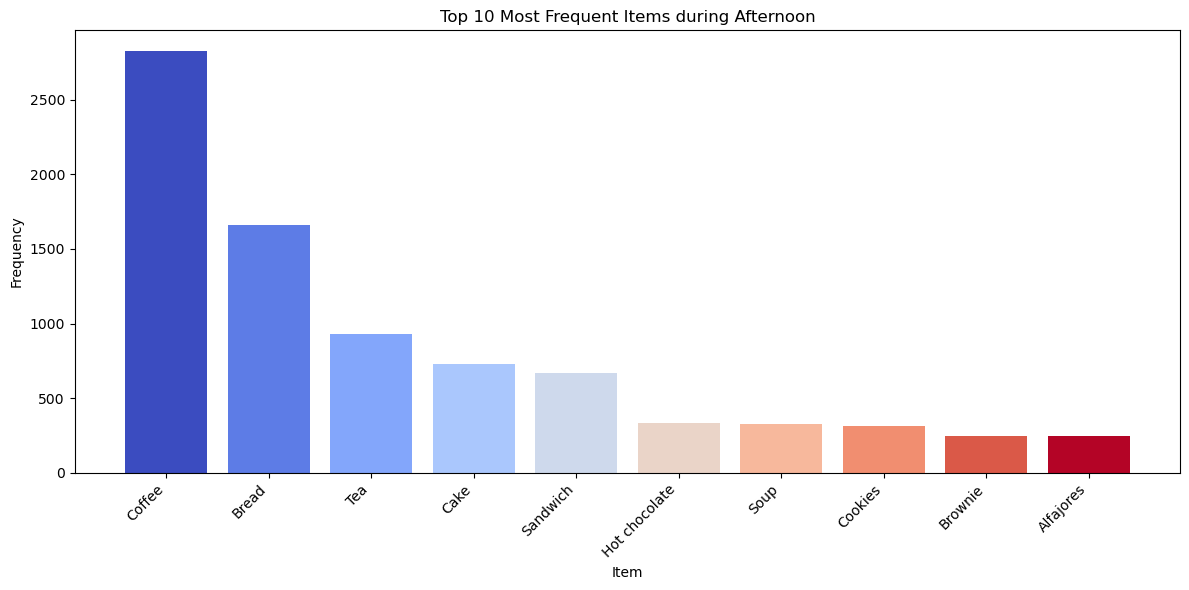

C:\Users\Michelle\AppData\Local\Temp\ipykernel_2552\4245627155.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap


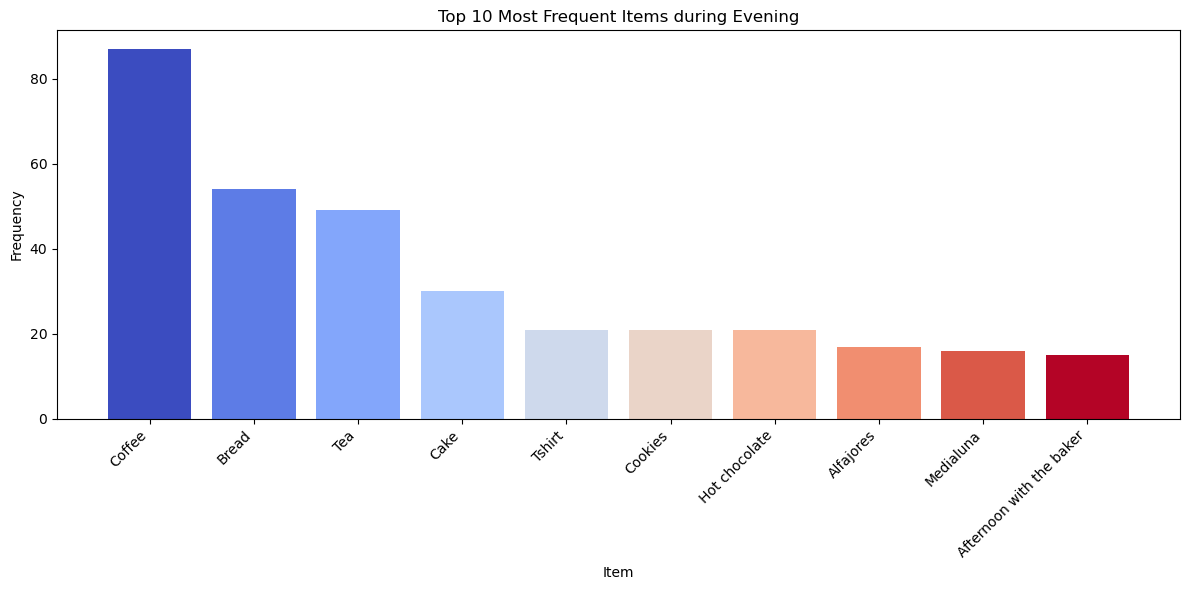

C:\Users\Michelle\AppData\Local\Temp\ipykernel_2552\4245627155.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap


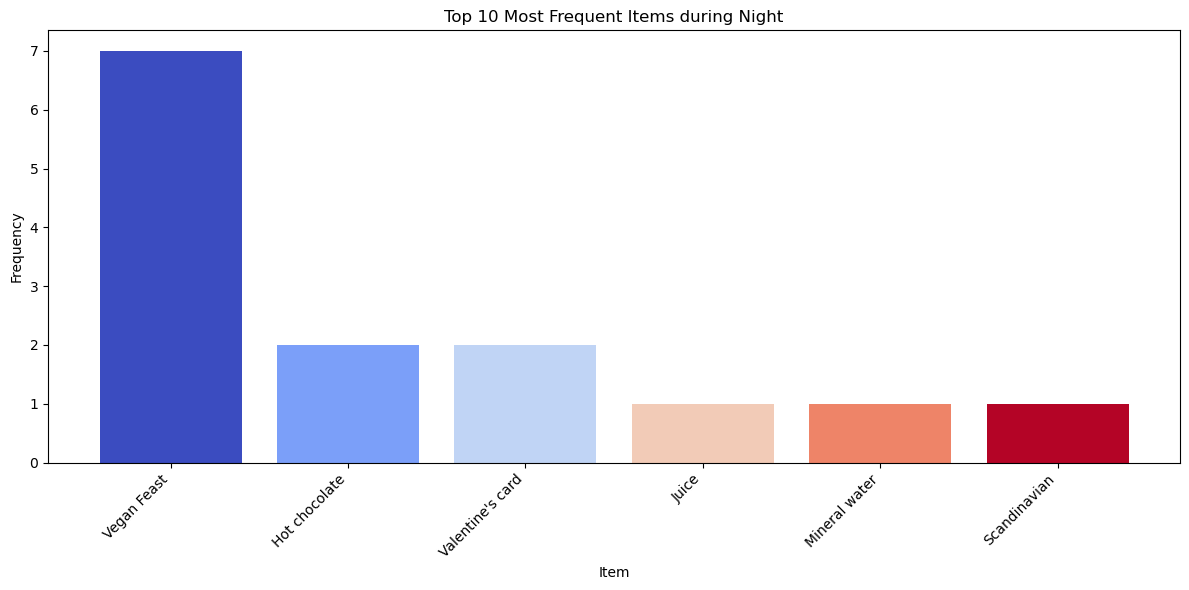

In [60]:
# 20
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    # Filter data for the specified period
    period_data = df[df['period_day'] == period]
    
    # Group by item and count occurrences for the period
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)
    
    # Create a bar plot for the top 10 items in the period
    plt.figure(figsize=(12, 6)) # Fixed indentation here
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10), 
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Items during {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()

# Plot for each period
for period in df['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is consumer behavior shifts throughout the day, with distinct trends in item popularity during different time periods. In the morning, coffee and breakfast items dominate, reflecting daily routines. Afternoon sees a rise in demand for snacks and beverages, while evenings favor dinner-related items or hearty snacks as people relax after work. At night, comfort food and late-night snacks take the spotlight. Understanding these patterns allows businesses to optimize marketing, promotions, and inventory management to match peak demand and reduce inefficiencies during slower periods.


I found a valentine card, I was curious about when people bought it so I made a visualization of it

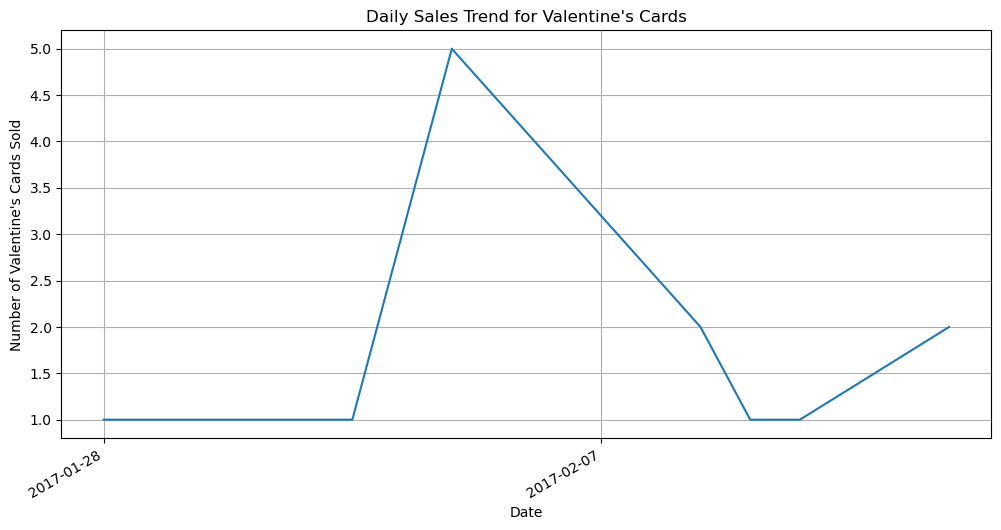

In [70]:
#22
# Assuming 'df' is your DataFrame as defined in the previous code.

# Filter transactions containing "Valentine's card"
valentines_card_transactions = df[df['Item'] == "Valentine's card"]

# Group by date and count transactions
valentines_sales_by_date = valentines_card_transactions.groupby('date')['Transaction'].count()


# Plot daily transaction trends for Valentine's card
plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Valentine\'s Cards Sold')
plt.title('Daily Sales Trend for Valentine\'s Cards')
plt.grid(True)
plt.show()

23. I found the insight from the sale of the Valentine's cards above is Valentine's card sales remain low from late January to early February, then spike around February 2nd, peaking on February 5th with over 5 cards sold. Sales decline afterward, hitting a low on February 10th-11th, but slightly rise again just before Valentine's Day, indicating last-minute purchases. The highest demand is about 10 days before Valentine's Day.


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [73]:
# 24
# Group data by 'Transaction' and 'Item' and sum quantities
df['Quantity'] = df.groupby(['Transaction', 'Item'])['Item'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
df = df.drop_duplicates(subset=['Transaction', 'Item'])

# Create a pivot table to represent transactions
transaction_data = df.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#25

# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transaction data
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [77]:
# 26
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

C:\Users\Michelle\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [78]:
# 27
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

C:\Users\Michelle\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

Transaction trends indicate that the bakery sees peak sales on weekends, particularly between 10 am and 12 pm, suggesting customers visit for mid-morning snacks or to buy bread for meals. Sales also increase towards the end of the year, likely due to holiday demand.

Popular items include Coffee, Bread, and Tea, which remain consistently favored throughout the day. In the afternoon, there is a noticeable rise in the sales of Cookies, Hot Chocolate, and Cakes, reflecting a preference for afternoon treats. Valentine's cards see a surge in sales around February 14th, aligning with seasonal demand.

The Apriori algorithm highlights frequent item pairings, such as Coffee with Toast, Medialuna, Pastry, and Cake, which can inform promotional bundles.

To optimize operations, the bakery can adjust staffing and inventory to meet peak-hour and weekend demands. Bundled promotions for popular combinations like Coffee and Toast can encourage additional purchases. Maintaining a consistent supply of core products like Coffee, Bread, and Tea is essential. Seasonal opportunities, such as Valentine’s Day, offer potential for targeted marketing. Promoting afternoon treats like Cookies and Cakes can further boost midday sales. These strategies can enhance customer satisfaction and drive business growth.
